In [1]:
%cd ..

/home/isham/Desktop/machine-learning-projects/circle-detector


/home/isham/anaconda3/envs/computer_vision/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from config import TRUE_COUNT_CSV_PATH, PREDICTED_COUNT_CSV_PATH

In [3]:
circle_counts_true = pd.read_csv(TRUE_COUNT_CSV_PATH)
circle_counts_true.head()

,image_name,number_of_circles
0,0ba4fa31-913c-45be-9e59-bc14fe4f324e_jpg.rf.89...,1
1,0c32061c-a21b-46e5-8b6b-b483b1829271_jpg.rf.cc...,2
2,00db272e-1d5f-4ff1-9cd6-1d8be42cb1a5_jpg.rf.f5...,13
3,001_jpg.rf.68d4fff5cb81c9ade16111b4434e2090.jpg,2
4,1ff6f5e0-f1c8-432b-82c3-69d248e7a403_jpg.rf.94...,1


In [4]:
circle_counts_pred = pd.read_csv(PREDICTED_COUNT_CSV_PATH)
circle_counts_pred.head()

,image_name,number_of_circles_pred
0,20190619_090037_jpg.rf.73718a57c35e547233dc959...,2
1,DSC_0873_jpg.rf.85e3b7af90b04a57277bca0fcb27dc...,5
2,436c85b6-0306-4fc0-ab57-a8d758ed5dfe_jpg.rf.22...,2
3,DSC_0376_jpg.rf.b5e7853d60fb1be4e8b2defc2885c9...,3
4,20190619_090231_jpg.rf.a69f951ba0a005df728a5ee...,1


In [5]:
# First, let's ensure we have grouped data (if not already done)
circle_counts_true_grouped = circle_counts_true.groupby('image_name')['number_of_circles'].first().reset_index()
circle_counts_pred_grouped = circle_counts_pred.groupby('image_name')['number_of_circles_pred'].first().reset_index()

# Perform the inner join
merged_counts = pd.merge(circle_counts_pred_grouped, circle_counts_true_grouped, 
                         on='image_name', 
                         how='inner')

# Rename columns for clarity
merged_counts = merged_counts.rename(columns={
    'number_of_circles_pred': 'predicted_count',
    'number_of_circles': 'true_count'
})

merged_counts

,image_name,predicted_count,true_count
0,001_jpg.rf.68d4fff5cb81c9ade16111b4434e2090.jpg,2,2
1,00334d13-4962-4b53-9dd2-121f8f000beb_jpg.rf.24...,1,1
2,0044de2f-d45b-4526-99eb-adf982d98b05_jpg.rf.21...,2,2
3,00db272e-1d5f-4ff1-9cd6-1d8be42cb1a5_jpg.rf.f5...,13,13
4,08665546-9cd5-413b-9eb8-baebbb7e34fd_jpg.rf.67...,1,1
...,...,...,...
185,download--66-_jpg.rf.4039d67d4633416a1f9c49183...,1,1
186,download--95-_jpg.rf.01518d3a04efa6c09f8e2adfb...,1,1
187,e47206ac-06e7-4895-929a-ce9b7adbf19d_jpg.rf.91...,2,2
188,e85515d6-3753-4ff0-93f8-bed4d6e22c92_jpg.rf.a1...,2,2


In [6]:
merged_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   image_name       190 non-null    object
 1   predicted_count  190 non-null    int64 
 2   true_count       190 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ KB


In [7]:
# Calculating metrics
accuracy = accuracy_score(merged_counts['true_count'], merged_counts['predicted_count'])
precision = precision_score(merged_counts['true_count'], merged_counts['predicted_count'], average='weighted')
recall = recall_score(merged_counts['true_count'], merged_counts['predicted_count'], average='weighted')
f1 = f1_score(merged_counts['true_count'], merged_counts['predicted_count'], average='weighted')

/home/isham/anaconda3/envs/computer_vision/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/isham/anaconda3/envs/computer_vision/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


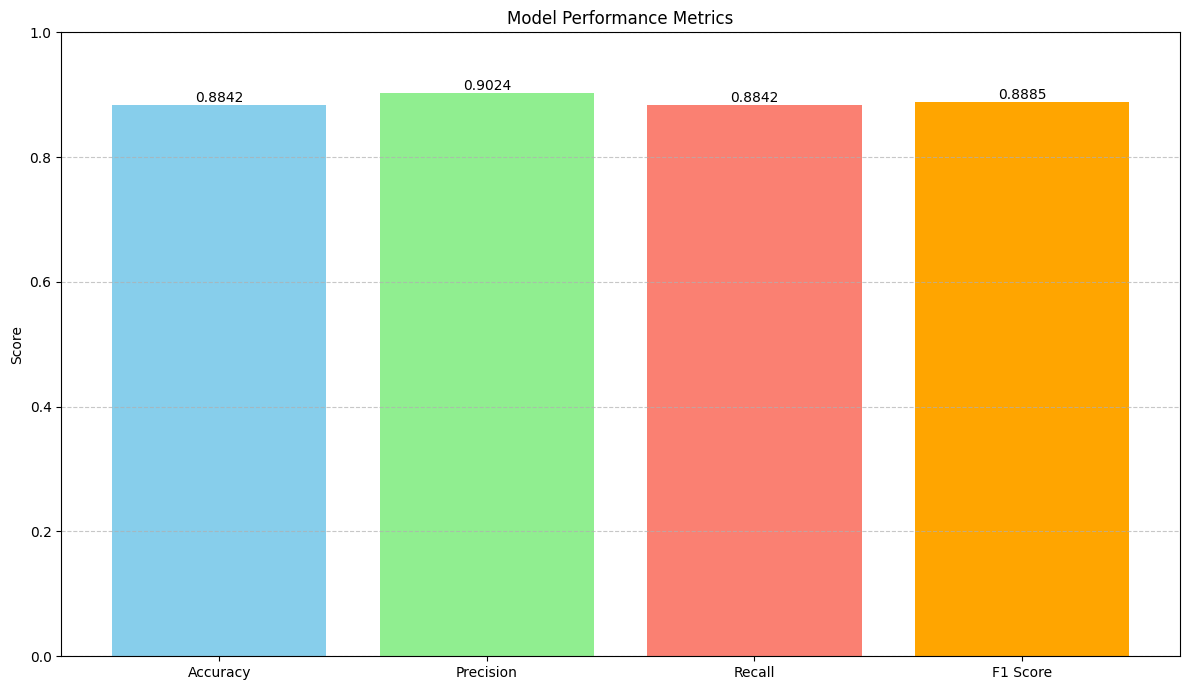

In [8]:
# Assuming you have calculated these values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(12, 7))
bars = plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

# Improve layout
plt.tight_layout()

# Display plot
plt.show()

In [9]:
# Calculating the absolute difference between true_count and predicted_count
merged_counts['difference'] = np.abs(merged_counts['true_count'] - merged_counts['predicted_count'])

In [10]:
merged_counts[merged_counts['difference'] > 0]

,image_name,predicted_count,true_count,difference
15,170_1479423174_jpg.rf.4e5db24f633d230a3260c1d8...,14,13,1
20,175_1479423456_jpg.rf.0723ceef6a241da65f4f36db...,15,14,1
46,51074018-b49e-4230-9365-09f97e783316_jpg.rf.10...,10,11,1
77,DSC_0356_2_jpg.rf.7cd8ab9f37ff21148cd5478a550c...,4,3,1
78,DSC_0357_1561683368_jpg.rf.5cdf8243f7decd518a6...,5,4,1
79,DSC_0357_jpg.rf.2d50504e8a54ce3b58b9d75c26cb63...,3,2,1
81,DSC_0362_jpg.rf.9cb7a503fa1449af35eadb5259dd51...,12,15,3
82,DSC_0367_jpg.rf.5ba9bc9aa6cb4eb03a1562354b07ef...,14,16,2
89,DSC_0378_2_jpg.rf.68f1706e7b9a449a27fdc1d83e80...,3,2,1
95,DSC_0405_1561781542_jpg.rf.ef138059c3f3b056b11...,12,10,2


In [14]:
print(f"Number of incorrect counts: { len(merged_counts[merged_counts['difference'] > 0])}")

Number of incorrect counts: 22
